<a href="https://colab.research.google.com/github/Genjis0604/Documentos/blob/main/Ciclos_Economicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
!pip install wbgapi
!pip install pandas_datareader

In [207]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import wbgapi as wb ## liberia para conectar con datos del Banco Mundial.
import pandas_datareader.data as web

In [208]:
wb.series.info(q='GDP growth')
## Código del indicador del Banco Mundial para el crecimiento anual del PIB % anual.

id,value
NY.GDP.MKTP.KD.ZG,GDP growth (annual %)
,1 elements


**Crecimiento del PIB**


In [209]:
## Datos sin procesar del PIB
delta_pib = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG', ['USA', 'ARG', 'GBR', 'GRC', 'JPN'], labels=True)
delta_pib

,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,...,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023,YR2024
economy,,,,,,,,,,,,,,,,,,,,,
JPN,Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,...,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.168765,2.696574,0.941999,1.475035,0.083699
GRC,Greece,NaN,13.203839,0.364812,11.844867,9.409677,10.768011,6.494501,5.669486,7.203718,...,-0.228302,-0.031795,1.473125,2.064672,2.277181,-9.196231,8.654498,5.743649,2.332124,2.271736
GBR,United Kingdom,NaN,2.701314,1.098696,4.859545,5.594811,2.130333,1.567450,2.775738,5.472693,...,2.222888,1.921710,2.656505,1.405190,1.624475,-10.296919,8.575951,4.839085,0.397082,1.100668
ARG,Argentina,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,...,2.731160,-2.080328,2.818503,-2.617396,-2.000861,-9.900485,10.441812,5.269880,-1.611002,-1.719105
USA,United States,NaN,2.565343,6.129637,4.357286,5.762747,6.498454,6.595342,2.742666,4.914509,...,2.945550,1.819451,2.457622,2.966505,2.583825,-2.163029,6.055053,2.512375,2.887556,2.796190


In [210]:
## Datos procesados del PIB
delta_pib = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG', ['USA', 'ARG', 'GBR', 'GRC', 'CHN', 'DEU', 'BRA', 'JPN', 'MEX'], labels=True)
delta_pib = delta_pib.set_index('Country') ## Contry pasa hacer el indice principal y NO economy
delta_pib.columns = delta_pib.columns.str.replace('YR', '').astype(int) ## Limpia los nombres de las columnas (años)

In [211]:
print(delta_pib)

                1960       1961      1962       1963       1964       1965  \
Country                                                                      
Mexico           NaN   5.000000  4.664415   8.106887  11.905481   7.100000   
Japan            NaN  12.043536  8.908973   8.473642  11.676708   5.819708   
Brazil           NaN   8.600000  6.600000   0.600000   3.400000   2.400000   
Germany          NaN   4.298440  4.623471   2.735296   6.639470   5.244164   
China            NaN -27.270000 -5.580000  10.300000  18.180000  16.950000   
Greece           NaN  13.203839  0.364812  11.844867   9.409677  10.768011   
United Kingdom   NaN   2.701314  1.098696   4.859545   5.594811   2.130333   
Argentina        NaN   5.427843 -0.852022  -5.308197  10.130298  10.569433   
United States    NaN   2.565343  6.129637   4.357286   5.762747   6.498454   

                     1966       1967       1968       1969  ...      2015  \
Country                                                     ... 

**Graficos de crecimiento con funciones**

In [212]:
#def plot_series(data, country, ylabel, ax, ylim=15, baseline=0, txt_pos=0.05):

Explicación: se crea una funcion llamada "plot_series" que tiene argumentos como:
*   data: este significa mi dataframe, es decir mi base de datos "wb.data.DataFrame"
*   Contry: nombre del pais que quiero graficas.
*   ylim: limite máximo y mínimo del eje Y.
*   ylabel: Titulo del eje Y.
*   baseline: linea base entorno al 0 en ex.
*   ax: eje donde se ubica la grafica.

In [213]:
# Parámetros gráficos
#    g_params = {'alpha': 0.7}
#    b_params = {'color': 'grey', 'alpha': 0.2}
#    t_params = {'color': 'grey', 'fontsize': 9, 'va': 'bottom', 'ha': 'center'}

Explicación: Se crea parametros para las graficos.

*   g_params: la línea de la serie con un oscuridad del 70%.
*   b_params: las sombras grises de recesión, color gris y opacidad del 20%.
*   t_params: los textos de etiquetas de recesión, centrados, letra pequeña.

In [214]:
# Graficar serie
#    ax.plot(data.loc[country], label=country, **g_params)

In [215]:
# Recesiones y etiquetas
#    recesiones = {
#        (1973, 1975): "Crisis del\npetróleo (1974)",
#        (1990, 1992): "Recesión\n1990s (1991)",
#        (2007, 2009): "Crisis\nfinanciera (2008)",
#        (2019, 2021): "Covid-19\n(2020)"}

Explicación: se crean las recesiones, es decir los espacios donde iran ubicados mis fondos de color distintos (b_params).
*   (1973, 1975): sombreará de 1973 a 1975.
*   "Crisis del\npetróleo (1974)": texto (con salto de línea real \n)

In [216]:
# Sombras de recesiones
#    for (inicio, fin) in recesiones:
#        ax.axvspan(inicio, fin, **b_params)

# Límite vertical
#    ax.set_ylim([-ylim, ylim])

Explicación: Sombrear recesiones

*   Recorre los periodos definidos y sombrea el fondo del gráfico entre los años inicio y fin usando la funcion axvspan.
* Pone limites de 15 en ambos eje de Y.

In [217]:
# Agregar texto con salto de línea real (\n)
#    for (inicio, fin), texto in recesiones.items():
#        ax.text((inicio + fin) / 2, ylim + ylim * txt_pos, texto, **t_params)

# Línea base y etiquetas
#    if baseline is not None:
#        ax.axhline(y=baseline, color='black', linestyle='--')

#    ax.set_ylabel(ylabel)
#    ax.legend()
#    return ax

Explicación: gregar texto explicativo sobre las recesiones

* (inicio + fin) / 2 → posición X (centrada entre los años de recesión).
* ylim + ylim * txt_pos: posición Y (por encima del gráfico).
* texto: el nombre de la crisis.
* **t_params: aplica el estilo de texto (gris, centrado, etc.).



In [218]:
def plot_series(data, country, ylabel, ax,
                ylim=15, baseline=0, txt_pos=0.05):
    g_params = {'color': 'green','alpha': 1 }
    b_params = {'color': 'red', 'alpha': 0.2}
    t_params = {'color': 'black', 'fontsize': 9, 'va': 'bottom', 'ha': 'center'}
    ax.plot(data.loc[country], label=country, **g_params)
    recesiones = {
        (1973, 1975): "Crisis del\npetróleo (1974)",
        (1990, 1992): "Recesión\n1990s (1991)",
        (2007, 2009): "Crisis\nfinanciera (2008)",
        (2019, 2021): "Covid-19\n(2020)"}
    for (inicio, fin) in recesiones:
        ax.axvspan(inicio, fin, **b_params)
    ax.set_ylim([-ylim, ylim])
    for (inicio, fin), texto in recesiones.items():
        ax.text((inicio + fin) / 2, ylim + ylim * txt_pos, texto, **t_params)
    if baseline is not None:
        ax.axhline(y=baseline, color='black', linestyle='--')
    ax.set_ylabel(ylabel)
    ax.legend()
    return ax

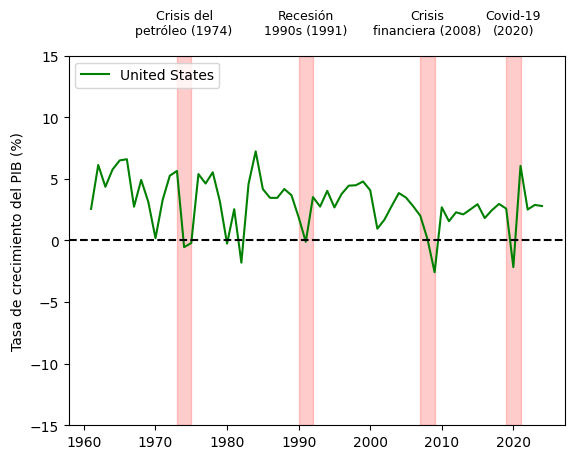

In [219]:
fig, ax = plt.subplots()
plot_series(delta_pib, 'United States', 'Tasa de crecimiento del PIB (%)', ax, txt_pos=0.1)
plt.show()

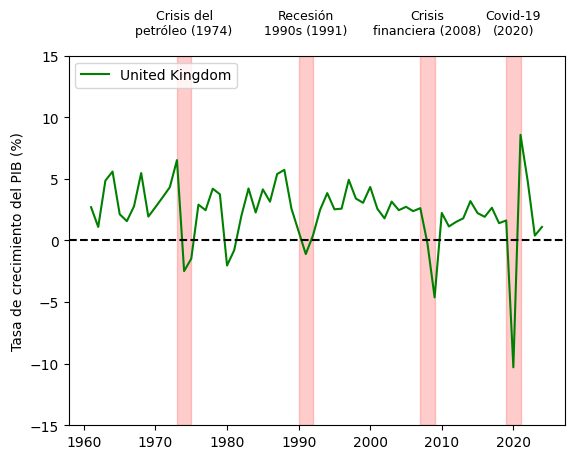

In [220]:
fig, ax = plt.subplots()
plot_series(delta_pib, 'United Kingdom', 'Tasa de crecimiento del PIB (%)', ax, txt_pos=0.1)
plt.show()

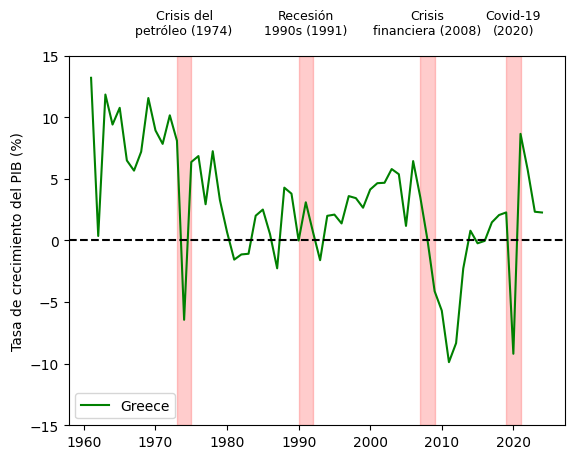

In [221]:
fig, ax = plt.subplots()
plot_series(delta_pib, 'Greece', 'Tasa de crecimiento del PIB (%)', ax, txt_pos=0.1)
plt.show()

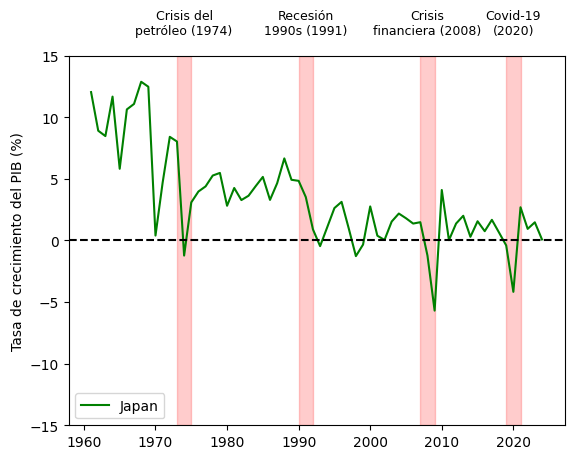

In [222]:
fig, ax = plt.subplots()
plot_series(delta_pib, 'Japan', 'Tasa de crecimiento del PIB (%)', ax, txt_pos=0.1)
plt.show()

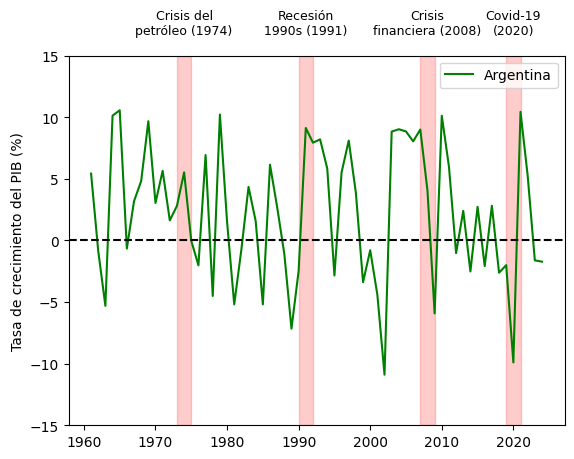

In [223]:
fig, ax = plt.subplots()
plot_series(delta_pib, 'Argentina', 'Tasa de crecimiento del PIB (%)', ax, txt_pos=0.1)
plt.show()

**Desempleo**

In [224]:
## Datos sin procesar del Desempleo
delta_une = wb.data.DataFrame('SL.UEM.TOTL.NE.ZS', ['USA', 'ARG', 'GBR', 'GRC', 'CHN', 'DEU', 'BRA', 'JPN', 'MEX'], labels=True)
delta_une

,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,...,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023,YR2024
economy,,,,,,,,,,,,,,,,,,,,,
MEX,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.311,3.853,3.419,3.275,3.477,4.378,3.941,3.174,2.704,2.616
JPN,Japan,1.7,1.4,1.3,1.3,1.1,1.2,1.3,1.3,1.2,...,3.385,3.132,2.822,2.467,2.351,2.809,2.808,2.614,2.600,2.500
BRA,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.538,11.580,12.792,12.329,11.936,13.697,13.158,9.231,7.947,6.801
DEU,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.612,4.104,3.781,3.384,3.163,3.881,3.594,3.137,3.071,3.372
CHN,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.900,4.930,5.150,5.610,5.110,NaN,NaN,NaN
GRC,Greece,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.981,23.514,21.413,19.179,17.045,15.899,14.656,12.426,11.023,10.020
GBR,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.552,4.909,4.501,4.145,3.657,4.518,4.864,3.768,4.025,4.361
ARG,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.347,9.220,9.843,11.461,8.736,6.805,6.139,1.694
USA,United States,5.5,6.7,5.5,5.7,5.2,4.5,3.8,3.8,3.6,...,5.280,4.869,4.355,3.896,3.669,8.055,5.349,3.650,3.638,4.022


In [225]:
## Datos procesados del desempleo
delta_une = wb.data.DataFrame('SL.UEM.TOTL.NE.ZS', ['USA', 'ARG', 'GBR', 'GRC', 'JPN'], labels=True)
delta_une = delta_une.set_index('Country')
delta_une.columns = delta_une.columns.str.replace('YR', '').astype(int)
print(delta_une)

                1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  \
Country                                                                      
Japan            1.7   1.4   1.3   1.3   1.1   1.2   1.3   1.3   1.2   1.1   
Greece           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
United Kingdom   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Argentina        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
United States    5.5   6.7   5.5   5.7   5.2   4.5   3.8   3.8   3.6   3.5   

                ...    2015    2016    2017    2018    2019    2020    2021  \
Country         ...                                                           
Japan           ...   3.385   3.132   2.822   2.467   2.351   2.809   2.808   
Greece          ...  24.981  23.514  21.413  19.179  17.045  15.899  14.656   
United Kingdom  ...   5.552   4.909   4.501   4.145   3.657   4.518   4.864   
Argentina       ...     NaN     NaN   8.347   9.220   9.84

In [226]:
def plot_series2(data, country, ylabel, ax,
                ylim=20, baseline=0, txt_pos=0.05):
    g_params = {'color': 'orange','alpha': 0.9 }
    b_params = {'color': 'gray', 'alpha': 0.2}
    t_params = {'color': 'gray', 'fontsize': 9, 'va': 'bottom', 'ha': 'center'}
    ax.plot(data.loc[country], label=country, **g_params)
    recesiones = {
        (1973, 1975): "Crisis del\npetróleo (1974)",
        (1990, 1992): "Recesión\n1990s (1991)",
        (2007, 2009): "Crisis\nfinanciera (2008)",
        (2019, 2021): "Covid-19\n(2020)"}
    for (inicio, fin) in recesiones:
        ax.axvspan(inicio, fin, **b_params)
    ax.set_ylim([-ylim, ylim])
    for (inicio, fin), texto in recesiones.items():
        ax.text((inicio + fin) / 2, ylim + ylim * txt_pos, texto, **t_params)
    if baseline is not None:
        ax.axhline(y=baseline, color='black', linestyle='--')
    ax.set_ylabel(ylabel)
    ax.legend()
    return ax

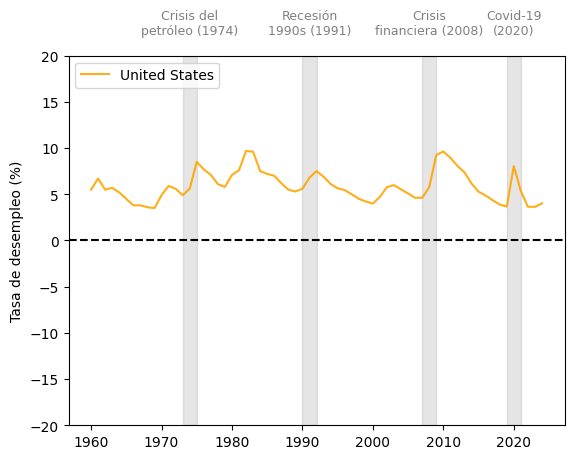

In [227]:
fig, ax = plt.subplots()
plot_series2(delta_une, 'United States', 'Tasa de desempleo (%)', ax, txt_pos=0.1)
plt.show()

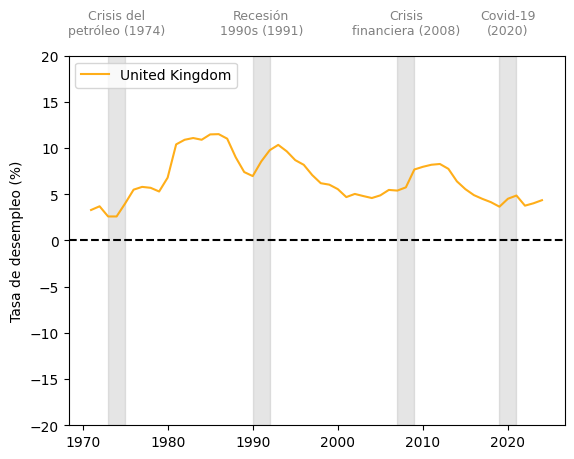

In [228]:
fig, ax = plt.subplots()
plot_series2(delta_une, 'United Kingdom', 'Tasa de desempleo (%)', ax, txt_pos=0.1)
plt.show()

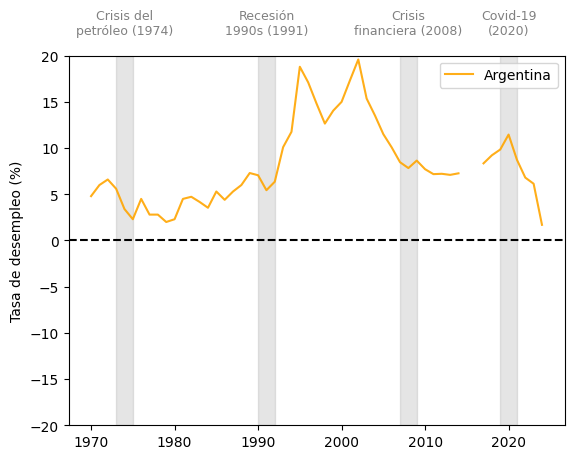

In [229]:
fig, ax = plt.subplots()
plot_series2(delta_une, 'Argentina', 'Tasa de desempleo (%)', ax, txt_pos=0.1)
plt.show()

**Credito**

In [230]:
## Datos sin procesar del Credito
credito = wb.data.DataFrame('FS.AST.PRVT.GD.ZS', ['USA', 'ARG', 'GBR', 'GRC', 'JPN'], labels=True)
credito

,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,...,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023,YR2024
economy,,,,,,,,,,,,,,,,,,,,,
JPN,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,162.387184,163.446907,168.661931,168.035146,176.790358,195.201447,195.272085,194.922445,193.694930,195.816207
GRC,Greece,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,113.433357,108.627097,100.647510,91.206933,80.212240,81.270975,56.197336,52.243355,49.104141,48.369893
GBR,United Kingdom,17.338941,17.493247,17.438054,19.343361,20.672065,20.623659,19.496596,19.824219,19.710468,...,130.867734,132.345574,133.269915,133.971270,132.563372,147.041578,138.381027,128.848239,119.761580,113.966557
ARG,Argentina,13.611244,14.088122,12.011114,11.520060,10.626694,10.106670,11.060475,10.943571,13.865923,...,14.414233,13.667633,15.958497,NaN,14.477629,15.746490,13.264429,12.913618,15.437577,15.239398
USA,United States,70.993680,75.168085,75.597208,80.321940,83.163132,86.159754,83.600329,87.115674,87.930905,...,183.632163,186.327051,194.090997,183.054002,194.735259,217.855590,220.381317,187.970100,192.589446,198.226503


In [231]:
## Datos procesados del Credito
credito = wb.data.DataFrame('FS.AST.PRVT.GD.ZS', ['USA', 'ARG', 'GBR', 'GRC', 'CHN', 'DEU', 'BRA', 'JPN', 'MEX'], labels=True)
credito = credito.set_index('Country')
credito.columns = credito.columns.str.replace('YR', '').astype(int)
print(credito)

                     1960       1961       1962       1963       1964  \
Country                                                                 
Mexico                NaN        NaN        NaN        NaN        NaN   
Japan                 NaN        NaN        NaN        NaN        NaN   
Brazil          17.972727  17.022008  17.028529  14.705662  13.523515   
Germany               NaN        NaN        NaN        NaN        NaN   
China                 NaN        NaN        NaN        NaN        NaN   
Greece                NaN        NaN        NaN        NaN        NaN   
United Kingdom  17.338941  17.493247  17.438054  19.343361  20.672065   
Argentina       13.611244  14.088122  12.011114  11.520060  10.626694   
United States   70.993680  75.168085  75.597208  80.321940  83.163132   

                     1965       1966       1967       1968       1969  ...  \
Country                                                                ...   
Mexico                NaN        NaN    

In [232]:
def plot_series3(data, country, ylabel, ax,
                ylim=40, baseline=0, txt_pos=0.05):
    g_params = {'color': 'black','alpha': 0.9 }
    b_params = {'color': 'blue', 'alpha': 0.2}
    t_params = {'color': 'blue', 'fontsize': 9, 'va': 'bottom', 'ha': 'center'}
    ax.plot(data.loc[country], label=country, **g_params)
    recesiones = {
        (1973, 1975): "Crisis del\npetróleo (1974)",
        (1990, 1992): "Recesión\n1990s (1991)",
        (2007, 2009): "Crisis\nfinanciera (2008)",
        (2019, 2021): "Covid-19\n(2020)"}
    for (inicio, fin) in recesiones:
        ax.axvspan(inicio, fin, **b_params)
    ax.set_ylim([-ylim, ylim])
    for (inicio, fin), texto in recesiones.items():
        ax.text((inicio + fin) / 2, ylim + ylim * txt_pos, texto, **t_params)
    if baseline is not None:
        ax.axhline(y=baseline, color='black', linestyle='--')
    ax.set_ylabel(ylabel)
    ax.legend()
    return ax

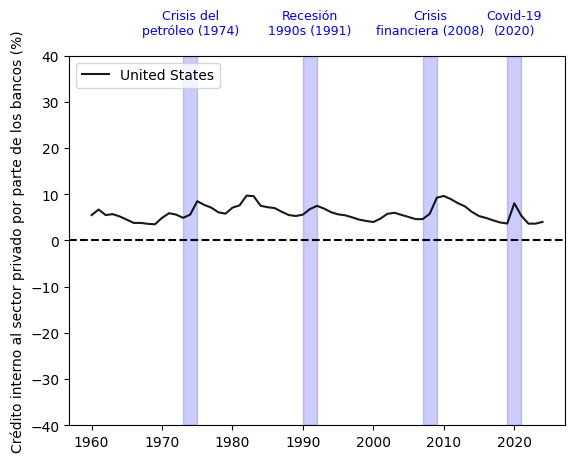

In [233]:
fig, ax = plt.subplots()
plot_series3(delta_une, 'United States', 'Crédito interno al sector privado por parte de los bancos (%)', ax, txt_pos=0.1)
plt.show()

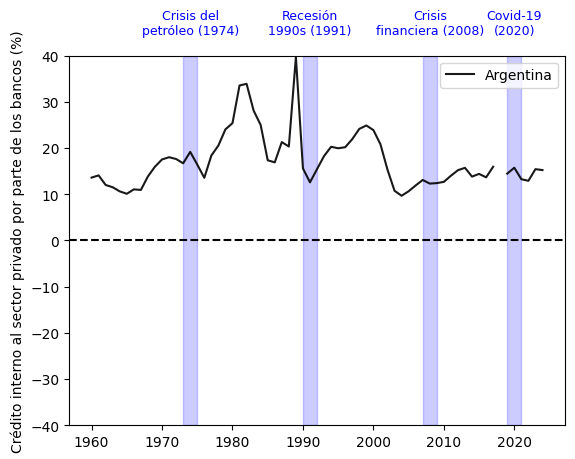

In [234]:
fig, ax = plt.subplots()
plot_series3(credito, 'Argentina', 'Crédito interno al sector privado por parte de los bancos (%)', ax, txt_pos=0.1)
plt.show()

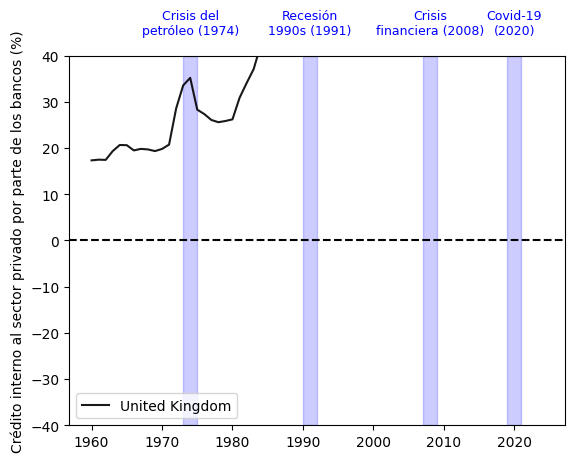

In [235]:
fig, ax = plt.subplots()
plot_series3(credito, 'United Kingdom', 'Crédito interno al sector privado por parte de los bancos (%)', ax, txt_pos=0.1)
plt.show()

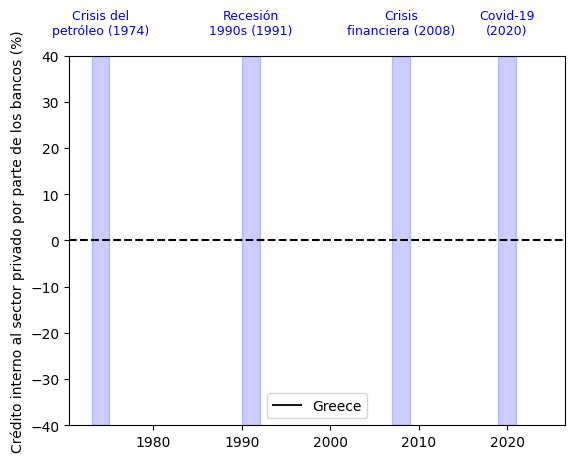

In [236]:
fig, ax = plt.subplots()
plot_series3(credito, 'Greece', 'Crédito interno al sector privado por parte de los bancos (%)', ax, txt_pos=0.1)
plt.show()

In [237]:
## Datos procesados del PIB
aerd = wb.data.DataFrame('GB.XPD.RSDV.GD.ZS', ['USA', 'ARG', 'GBR', 'GRC', 'CHN', 'DEU', 'BRA', 'JPN', 'MEX'], labels=True)
aerd = aerd.set_index('Country') ## Contry pasa hacer el indice principal y NO economy
aerd.columns = aerd.columns.str.replace('YR', '').astype(int) ## Limpia los nombres de las columnas (años)
print(aerd)

                1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  \
Country                                                                      
Mexico           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Japan            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Brazil           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Germany          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
China            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Greece           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
United Kingdom   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Argentina        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
United States    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                ...     2015     2016     2017     2018     2019     2020  \
Country         ...                                             